In [1]:
# 기본 라이브러리
%matplotlib inline
from preamble import *

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm ### 한글 폰트 깨지는 것 방지        
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False ###
import seaborn as sns
import talib
from pprint import pprint
import warnings #경고문 X
warnings.filterwarnings('ignore') # 경고문 X
sns.set(style="ticks") # seaborn 스타일

In [3]:
F0702 = pd.read_csv('data/20180702/KP200_Future_0.csv', header=None)

In [4]:
# 분석할 대상 속성만 남기고 속성 제거
F0702 = F0702.drop(F0702.columns[5:], axis=1)
F0702 = F0702.drop(F0702.columns[[0]], axis=1)

In [5]:
F0702.head()

,1,2,3,4
0,101N9,9000000,1,299.00
1,101N9,9000001,1,298.95
2,101N9,9000030,1,299.00
3,101N9,9000030,1,298.95
4,101N9,9000031,1,299.00


In [6]:
F0702.columns = ['code', 'time', 'id', 'price']

In [7]:
df = F0702

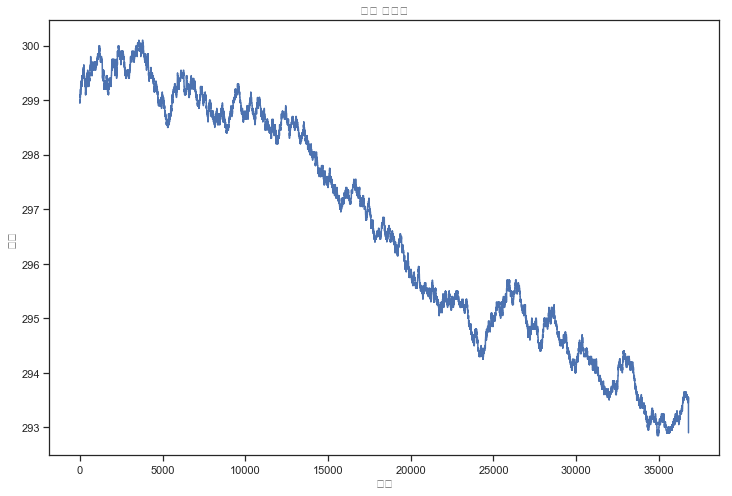

In [8]:
# price 그래프
plt.figure(figsize=(12,8))
df['price'].plot()
plt.title("주가 그래프")
plt.xlabel('거래')
plt.ylabel('주가')
plt.show()

In [9]:
# smooth
import scipy
from scipy import signal

In [10]:
# smooth MA(moving average)
def smoothTriangle(data, degree, dropVals=False):
    triangle=np.array(list(range(degree)) + [degree] + list(range(degree)[::-1])) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    if dropVals:
        return smoothed
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [11]:
df['smooth_price'] = signal.savgol_filter(df['price'], 777, 3)

In [12]:
df['MA_price'] = smoothTriangle(df['smooth_price'], 100)

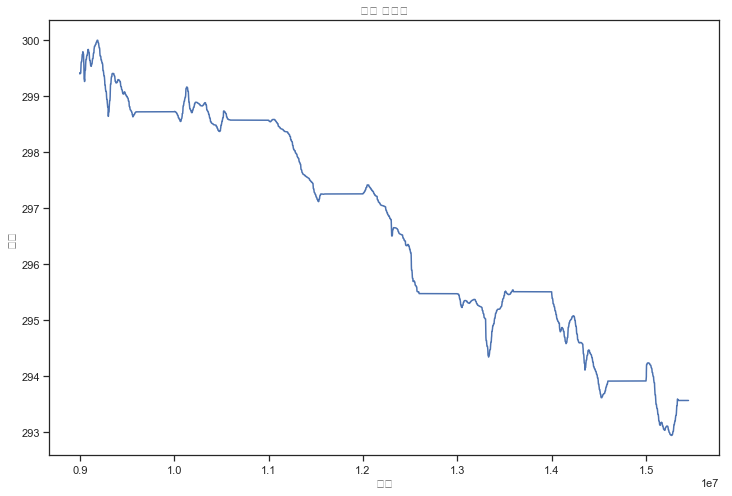

In [13]:
# smooth Triangle 함수 이용
plt.figure(figsize=(12,8))
plt.plot(df.time, df.MA_price)
plt.title("주가 그래프")
plt.xlabel('거래')
plt.ylabel('주가')
plt.show()

In [14]:
df['r_price'] = df['price'].rolling(window = 1500, min_periods = 1).mean()

In [15]:
# 날짜 변환후 indexing
df['day'] = '2018-07-02'
df['time']= df['time'].astype(str)
df['datetime'] = df['day'] + " " + df['time']
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H%M%S%f')
df = df.set_index('datetime')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36787 entries, 2018-07-02 09:00:00 to 2018-07-02 15:45:01.280000
Data columns (total 8 columns):
code            36787 non-null object
time            36787 non-null object
id              36787 non-null int64
price           36787 non-null float64
smooth_price    36787 non-null float64
MA_price        36787 non-null float64
r_price         36787 non-null float64
day             36787 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ MB


In [17]:
df.head()

,code,time,id,price,smooth_price,MA_price,r_price,day
datetime,,,,,,,,
2018-07-02 09:00:00.000,101N9,9000000,1,299.00,299.05,299.39,299.00,2018-07-02
2018-07-02 09:00:00.010,101N9,9000001,1,298.95,299.06,299.39,298.98,2018-07-02
2018-07-02 09:00:00.300,101N9,9000030,1,299.00,299.06,299.39,298.98,2018-07-02
2018-07-02 09:00:00.300,101N9,9000030,1,298.95,299.06,299.39,298.98,2018-07-02
2018-07-02 09:00:00.310,101N9,9000031,1,299.00,299.07,299.39,298.98,2018-07-02


In [18]:
high_target, _ = scipy.signal.find_peaks(df['r_price'])
low_target, _ = scipy.signal.find_peaks(-df['r_price'])

In [19]:
type(high_target)

numpy.ndarray

In [20]:
type(low_target)

numpy.ndarray

In [21]:
df.index[high_target]

DatetimeIndex(['2018-07-02 09:00:00.300000', '2018-07-02 09:00:00.310000',
               '2018-07-02 09:00:01.070000', '2018-07-02 09:00:01.110000',
               '2018-07-02 09:00:34.060000', '2018-07-02 09:00:36.250000',
               '2018-07-02 09:00:55.800000', '2018-07-02 09:00:56.360000',
               '2018-07-02 09:01:00.460000', '2018-07-02 09:01:00.600000',
               ...
               '2018-07-02 15:30:24.400000', '2018-07-02 15:30:33.950000',
               '2018-07-02 15:30:42.350000', '2018-07-02 15:30:43.980000',
                      '2018-07-02 15:30:46', '2018-07-02 15:31:02.200000',
               '2018-07-02 15:31:05.150000', '2018-07-02 15:31:10.730000',
               '2018-07-02 15:31:52.220000', '2018-07-02 15:34:59.480000'],
              dtype='datetime64[ns]', name='datetime', length=140, freq=None)

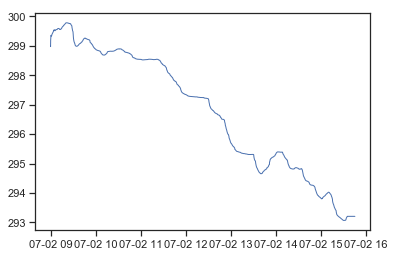

In [22]:
plt.plot(df.index, df.r_price, 'b', lw=1)

In [23]:
high_target, _ = scipy.signal.find_peaks(df['r_price'])
low_target, _ = scipy.signal.find_peaks(-df['r_price'], distance = 1)

In [24]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [25]:
df.index.to_pydatetime()

array([datetime.datetime(2018, 7, 2, 9, 0),
       datetime.datetime(2018, 7, 2, 9, 0, 0, 10000),
       datetime.datetime(2018, 7, 2, 9, 0, 0, 300000), ...,
       datetime.datetime(2018, 7, 2, 15, 34, 59, 480000),
       datetime.datetime(2018, 7, 2, 15, 45),
       datetime.datetime(2018, 7, 2, 15, 45, 1, 280000)], dtype=object)

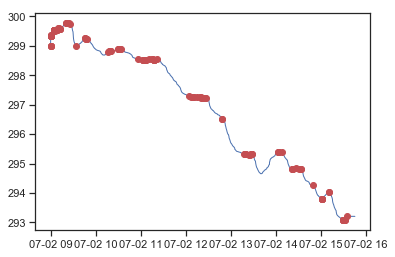

In [26]:
# 고저점 반영한 그래프
plt.plot(df.index, df.r_price, 'b', lw=1)
plt.plot(df.index[high_target], df.r_price[high_target], 'ro')

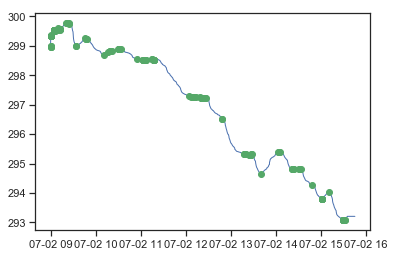

In [27]:
# 고저점 반영한 그래프
plt.plot(df.index, df.r_price, 'b', lw=1)
plt.plot(df.index[low_target], df.r_price[low_target], 'go')

In [28]:
min(df.r_price[low_target])

293.06693333333885

In [29]:
max(df.r_price[high_target])

299.7857666666661

In [30]:
def step1_updown(df, price) :
    if price[0] - price[len(df)] > 0 :
        up = df
    else :
        down = df
    return up, down

In [ ]:
def step2_1_lift(up, price, roll_price) :
    
    high_target, _ = scipy.signal.find_peaks(roll_price)
    low_target, _ = scipy.signal.find_peaks(-roll_price)
    
    for n in range(0, len(up)) :
        if max(roll_price[high_target]).index >= price.index :
            lift = max(roll_price[high_target]) - price[n]
        else :
            lift = 0

In [ ]:
def step2_2_downward(down, price, roll_price) :
    
    high_target, _ = scipy.signal.find_peaks(roll_price)
    low_target, _ = scipy.signal.find_peaks(-roll_price)
        
    for n in range(0, len(down)) :   
        if min(roll_price[low_target]).index >= price.index :
            downward = price[n] - min(roll_price[low_target])
        else :
            downward = 0
        if roll_price[high_target].index >= price.index :
            lift = max(roll_price[high_target]) - price[n]
        elif 

In [56]:
min(df.r_price[low_target])

293.06693333333885

In [122]:
a = [8, 3, 2, 10, 15, 7, 1, 9, 0, 11]
list(filter(lambda x: x > 5 and x < 10, a))

[8, 7, 9]

In [145]:
lambda x : x == min(df.r_price[low_target]), df.r_price[low_target]

(<function __main__.<lambda>(x)>, datetime
 2018-07-02 09:00:00.010    298.98
 2018-07-02 09:00:00.300    298.98
 2018-07-02 09:00:00.340    298.98
 2018-07-02 09:00:01.070    298.98
 2018-07-02 09:00:01.130    298.98
 2018-07-02 09:00:35.580    299.36
 2018-07-02 09:00:54.480    299.33
 2018-07-02 09:00:55.860    299.33
 2018-07-02 09:01:00.450    299.33
 2018-07-02 09:01:00.460    299.33
 2018-07-02 09:01:00.650    299.33
 2018-07-02 09:01:00.650    299.33
 2018-07-02 09:01:02.190    299.33
 2018-07-02 09:01:12.940    299.34
 2018-07-02 09:04:50.780    299.54
 2018-07-02 09:04:50.990    299.54
 2018-07-02 09:04:52.610    299.54
 2018-07-02 09:04:53.980    299.54
 2018-07-02 09:04:58.380    299.53
 2018-07-02 09:05:02.080    299.54
 2018-07-02 09:05:02.510    299.54
 2018-07-02 09:05:03.540    299.54
 2018-07-02 09:05:46.510    299.51
 2018-07-02 09:05:52.660    299.51
 2018-07-02 09:07:49.000    299.55
 2018-07-02 09:07:58.210    299.55
 2018-07-02 09:08:14.000    299.55
 2018-07-02 

In [142]:
a